In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Coastal = pd.read_csv('Coastal_1960_2020_dTx_complete.txt', sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])
Forest = pd.read_csv('Forest_1960_2020_dTx_complete.txt', sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])
Guinea = pd.read_csv('Guinea_1960_2020_dTx_complete.txt', sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])
Sudan = pd.read_csv('Sudan_1960_2020_dTx_complete.txt', sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])
Transition = pd.read_csv('Transition_1960_2020_dTx_complete.txt', sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])


In [4]:
Guinea['Tmax'].max()

42.8

In [5]:

# # Step 1: Calculate annual mean Tmax
# annual_mean = bole.groupby('year')['Tmax'].mean().reset_index()
# annual_mean.columns = ['year', 'mean_Tmax']

# # Step 2: Calculate long-term average (mean Tmax for the entire period)
# long_term_mean = annual_mean['mean_Tmax'].mean()

# # Step 3: Calculate the standard deviation of the annual mean Tmax
# std_dev = annual_mean['mean_Tmax'].std()

# # Step 4: Calculate the standardized anomaly
# annual_mean['standardized_anomaly'] = (annual_mean['mean_Tmax'] - long_term_mean) / std_dev

# # Display the results
# annual_mean



In [6]:
import pandas as pd

# Define the locations and corresponding file paths
locations = {
    'Coastal': 'Coastal_1960_2020_dTx_complete.txt',
    'Guinea': 'Guinea_1960_2020_dTx_complete.txt',
    'Sudan': 'Sudan_1960_2020_dTx_complete.txt',
    'Forest': 'Forest_1960_2020_dTx_complete.txt',
    'Transition': 'Transition_1960_2020_dTx_complete.txt',
    #'Tamale': 'Tamale_1960_2020_dTx_complete.txt'
}

# Function to calculate annual mean, long-term mean, and standardized anomaly
def calculate_standardized_anomaly(file_path):
    # Load the dataset
    data = pd.read_csv(file_path, sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])
    
    # Step 1: Calculate annual mean Tmax
    annual_mean = data.groupby('year')['Tmax'].mean().reset_index()
    annual_mean.columns = ['year', 'mean_Tmax']
    
    # Step 2: Calculate long-term average (mean Tmax for the entire period)
    long_term_mean = annual_mean['mean_Tmax'].mean()
    
    # Step 3: Calculate the standard deviation of the annual mean Tmax
    std_dev = annual_mean['mean_Tmax'].std()
    
    # Step 4: Calculate the standardized anomaly
    annual_mean['standardized_anomaly'] = (annual_mean['mean_Tmax'] - long_term_mean) / std_dev
    
    return annual_mean

# Dictionary to store the results for each location
results = {}

# Loop through each location and calculate the standardized anomaly
for location, file_path in locations.items():
    results[location] = calculate_standardized_anomaly(file_path)
    # Display the first few rows for each location
    print(f"Results for {location}:")
    print(results[location], "\n")



Results for Coastal:
    year  mean_Tmax  standardized_anomaly
0   1960  30.850683             -0.679409
1   1961  30.716575             -1.057904
2   1962  30.731699             -1.015222
3   1963  30.764466             -0.922742
4   1964  30.506803             -1.649948
..   ...        ...                   ...
56  2016  31.770109              1.915506
57  2017  31.339616              0.700517
58  2018  30.189534             -2.545383
59  2019  30.373918             -2.024994
60  2020  30.667268             -1.197066

[61 rows x 3 columns] 

Results for Guinea:
    year  mean_Tmax  standardized_anomaly
0   1960  33.777623             -0.780368
1   1961  33.718795             -0.898917
2   1962  33.457288             -1.425894
3   1963  33.564384             -1.210079
4   1964  33.359754             -1.622440
..   ...        ...                   ...
56  2016  35.215027              2.116226
57  2017  34.932521              1.546931
58  2018  33.658384             -1.020654
59  2019  

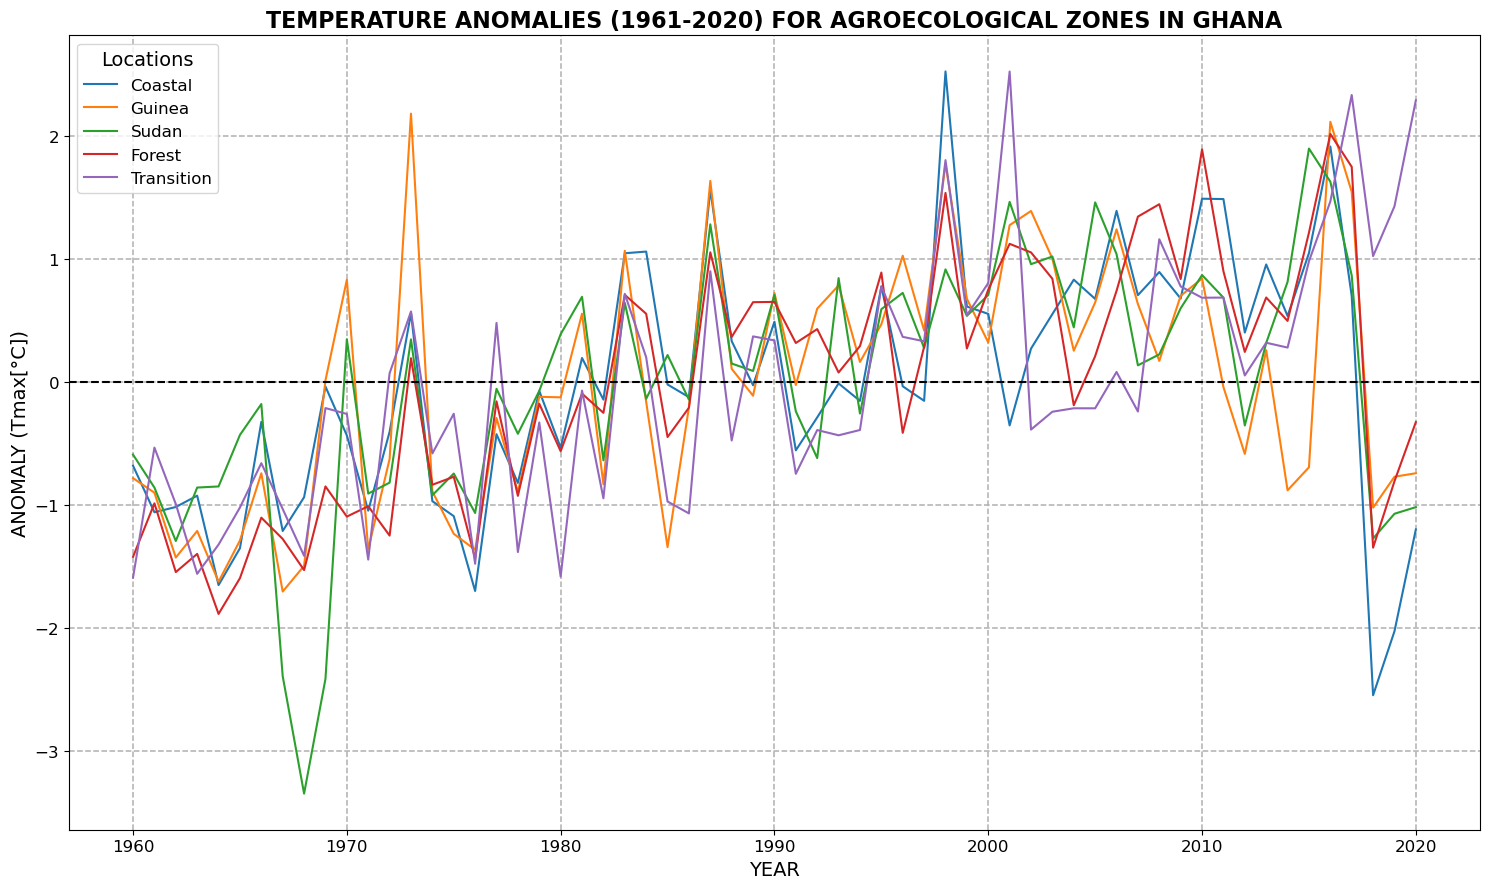

In [9]:
plt.figure(figsize=(15, 9))

# Plot each location
for location, file_path in locations.items():
    # Get the standardized anomaly data
    annual_mean = calculate_standardized_anomaly(file_path)
    
    # Plot the standardized anomalies
    plt.plot(annual_mean['year'], annual_mean['standardized_anomaly'], label=location)

# Add the y=0 horizontal line to represent the long-term mean
plt.axhline(0, color='black', linestyle='--', lw=1.5)


plt.grid(True, which='both', linestyle='--', linewidth=1.1)

# Set plot title and labels with improved font sizes
plt.title('TEMPERATURE ANOMALIES (1961-2020) FOR AGROECOLOGICAL ZONES IN GHANA', fontsize=16, fontweight='bold')
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('ANOMALY (Tmax[°C])', fontsize=14)

# Customize the legend
plt.legend(title='Locations', fontsize=12, title_fontsize=14, loc='upper left')

# Adjust the ticks on the axes for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Apply a tight layout
plt.tight_layout()

# Show the plot
plt.show()


# Labeling the plot
#fig.savefig('anomaly.png',bbox_inches='tight',dpi=500)


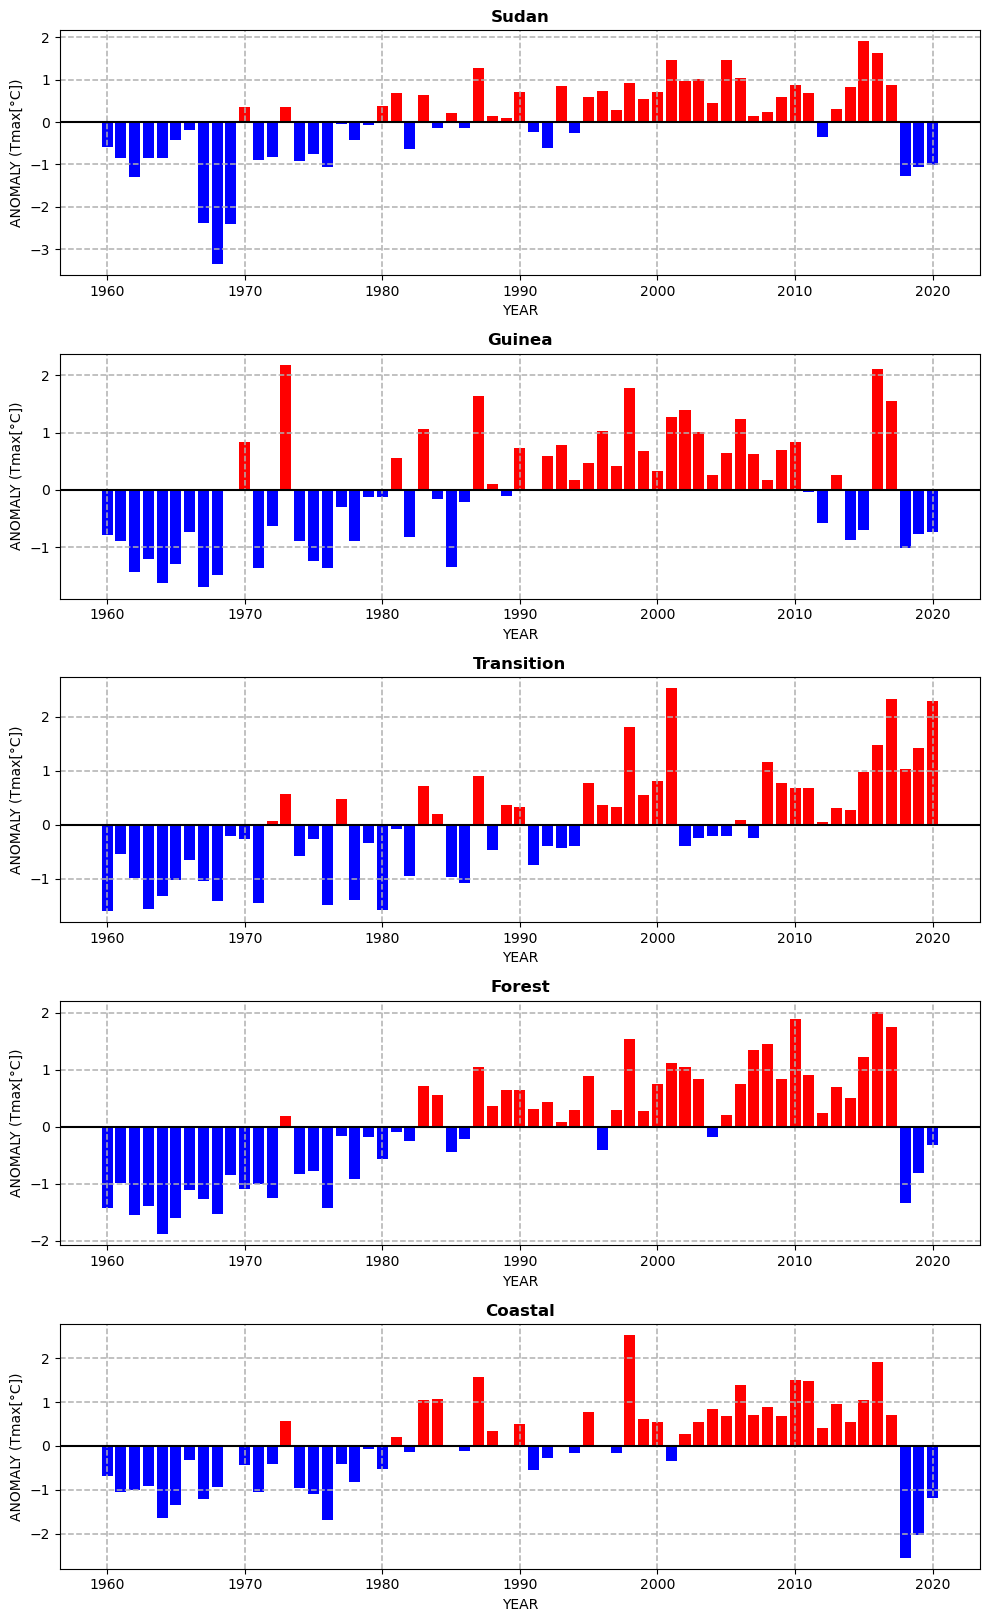

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the locations and corresponding file paths
locations = {
    'Sudan': 'Sudan_1960_2020_dTx_complete.txt',
    'Guinea': 'Guinea_1960_2020_dTx_complete.txt',
    'Transition': 'Transition_1960_2020_dTx_complete.txt',
    'Forest': 'Forest_1960_2020_dTx_complete.txt',
    'Coastal': 'Coastal_1960_2020_dTx_complete.txt'
    
    # 'Tamale': 'Tamale_1960_2020_dTx_complete.txt'
}

# Function to calculate annual mean, long-term mean, and standardized anomaly
def calculate_standardized_anomaly(file_path):
    # Load the dataset
    data = pd.read_csv(file_path, sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])

    # Step 1: Calculate annual mean Tmax
    annual_mean = data.groupby('year')["Tmax"].mean().reset_index()
    annual_mean.columns = ['year', 'mean_Tmax']

    # Step 2: Calculate long-term average (mean Tmax for the entire period)
    long_term_mean = annual_mean['mean_Tmax'].mean()

    # Step 3: Calculate the standard deviation of the annual mean Tmax
    std_dev = annual_mean['mean_Tmax'].std()

    # Step 4: Calculate the standardized anomaly
    annual_mean['standardized_anomaly'] = (annual_mean['mean_Tmax'] - long_term_mean) / std_dev

    return annual_mean

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 17))  # 5 rows, 1 column
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each location and calculate the standardized anomaly
for i, (location, file_path) in enumerate(locations.items()):
    data = calculate_standardized_anomaly(file_path)

    # Determine colors for the bars based on anomaly values
    colors = ['red' if val > 0 else 'blue' for val in data['standardized_anomaly']]

    # Plotting as bar plot on the respective subplot
    axes[i].bar(data['year'], data['standardized_anomaly'], color=colors, label=f'{location}')

    # Adding a horizontal line at y=0
    axes[i].axhline(0, color='black',  linewidth=1.5)

    # Customize the subplot
    axes[i].set_title(f'{location}', fontweight='bold' )
    axes[i].set_xlabel('YEAR')
    axes[i].set_ylabel('ANOMALY (Tmax[°C])', fontsize=10)
    axes[i].grid(True,which='both', linestyle='--', linewidth=1.1)

# Add a subtitle to the figure
#fig.suptitle('MAXIMUM TEMPERATURE ANOMALIES (1961-2020) FOR AGROECOLOGICAL ZONES IN GHANA', fontsize=13, fontweight='bold', y=0.97)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the final figure with subplots
plt.show()

# Optionally, save the entire figure
fig.savefig('anomaly_barplots_for_Maximum.png', bbox_inches='tight', dpi=500)


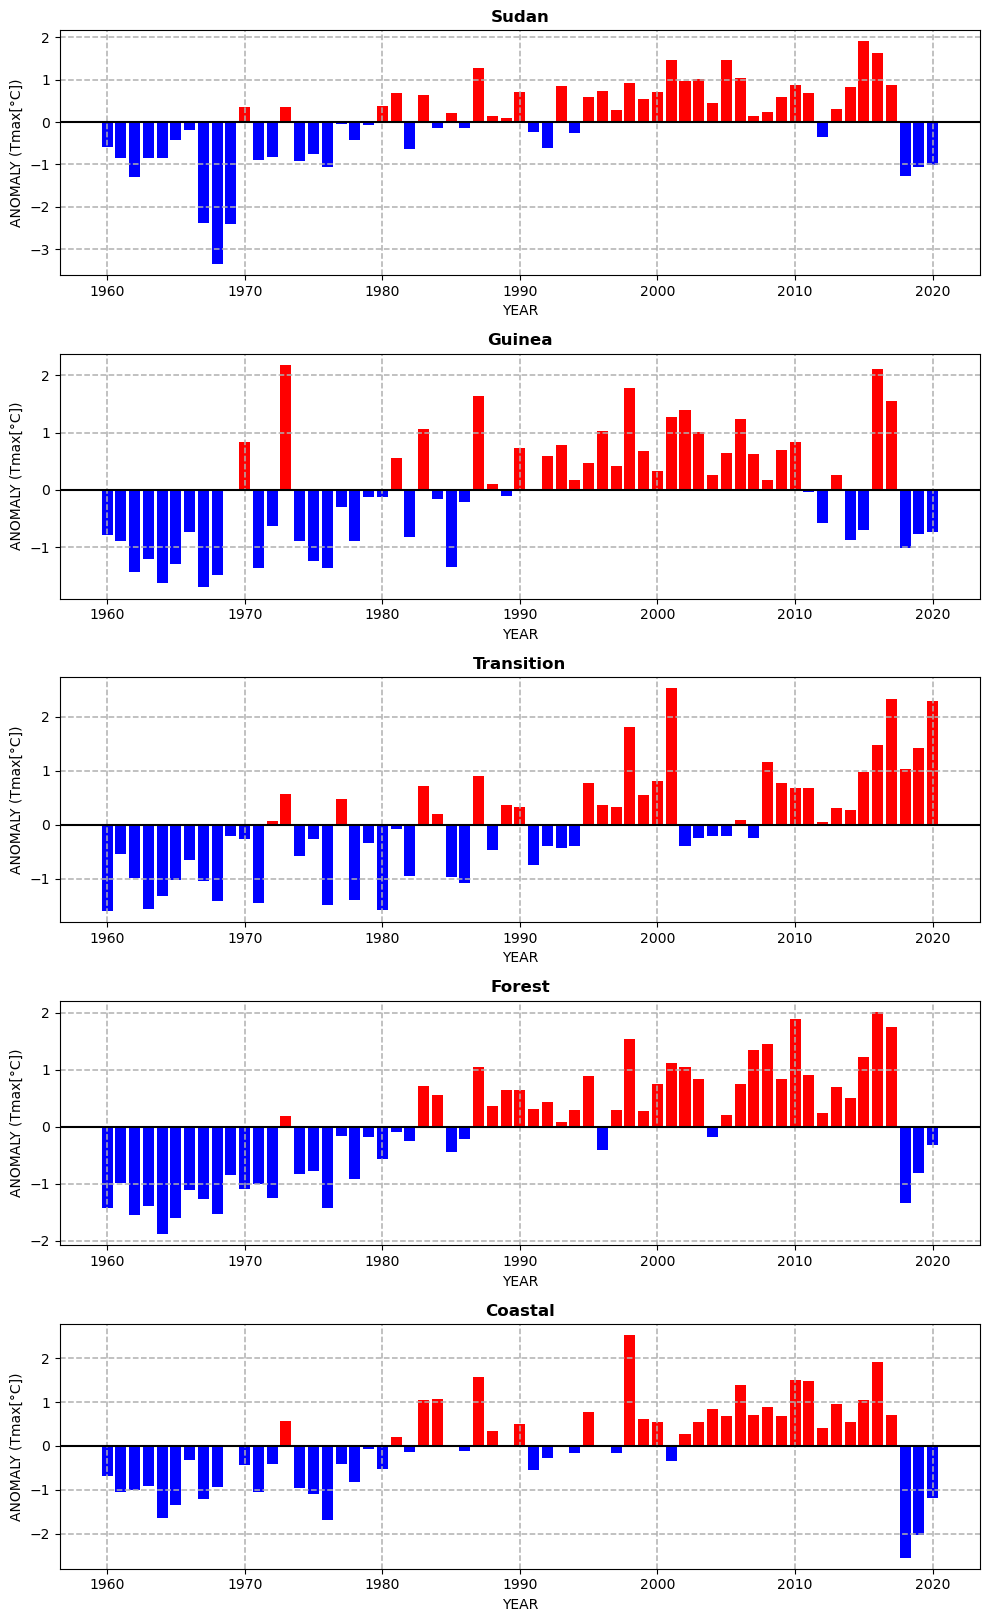

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the locations and corresponding file paths
locations = {
    'Sudan': 'Sudan_1960_2020_dTx_complete.txt',
    'Guinea': 'Guinea_1960_2020_dTx_complete.txt',
    'Transition': 'Transition_1960_2020_dTx_complete.txt',
    'Forest': 'Forest_1960_2020_dTx_complete.txt',
    'Coastal': 'Coastal_1960_2020_dTx_complete.txt'
    
    # 'Tamale': 'Tamale_1960_2020_dTx_complete.txt'
}

# Function to calculate annual mean, long-term mean, and standardized anomaly
def calculate_standardized_anomaly(file_path):
    # Load the dataset
    data = pd.read_csv(file_path, sep=r'\s+', header=None, names=["year", "month", "day", "Tmax"])

    # Step 1: Calculate annual mean Tmax
    annual_mean = data.groupby('year')["Tmax"].mean().reset_index()
    annual_mean.columns = ['year', 'mean_Tmax']

    # Step 2: Calculate long-term average (mean Tmax for the entire period)
    long_term_mean = annual_mean['mean_Tmax'].mean()

    # Step 3: Calculate the standard deviation of the annual mean Tmax
    std_dev = annual_mean['mean_Tmax'].std()

    # Step 4: Calculate the standardized anomaly
    annual_mean['standardized_anomaly'] = (annual_mean['mean_Tmax'] - long_term_mean) / std_dev

    return annual_mean

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 17))  # 5 rows, 1 column
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each location and calculate the standardized anomaly
for i, (location, file_path) in enumerate(locations.items()):
    data = calculate_standardized_anomaly(file_path)

    # Determine colors for the bars based on anomaly values
    colors = ['red' if val > 0 else 'blue' for val in data['standardized_anomaly']]

    # Plotting as bar plot on the respective subplot
    axes[i].bar(data['year'], data['standardized_anomaly'], color=colors, label=f'{location}')

    # Adding a horizontal line at y=0
    axes[i].axhline(0, color='black',  linewidth=1.5)

    # Customize the subplot
    axes[i].set_title(f'{location}', fontweight='bold' )
    axes[i].set_xlabel('YEAR')
    axes[i].set_ylabel('ANOMALY (Tmax[°C])', fontsize=10)
    axes[i].grid(True,which='both', linestyle='--', linewidth=1.1)

# Add a subtitle to the figure
#fig.suptitle('MINIMUM TEMPERATURE ANOMALIES (1961-2020) FOR AGROECOLOGICAL ZONES IN GHANA', fontsize=13, fontweight='bold', y=0.97)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the final figure with subplots
plt.show()

# Optionally, save the entire figure
fig.savefig('anomaly_barplots_for_Minimum.png', bbox_inches='tight', dpi=500)
